In [1]:
# Import the libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="deleted",
    database="ecommerce"
)

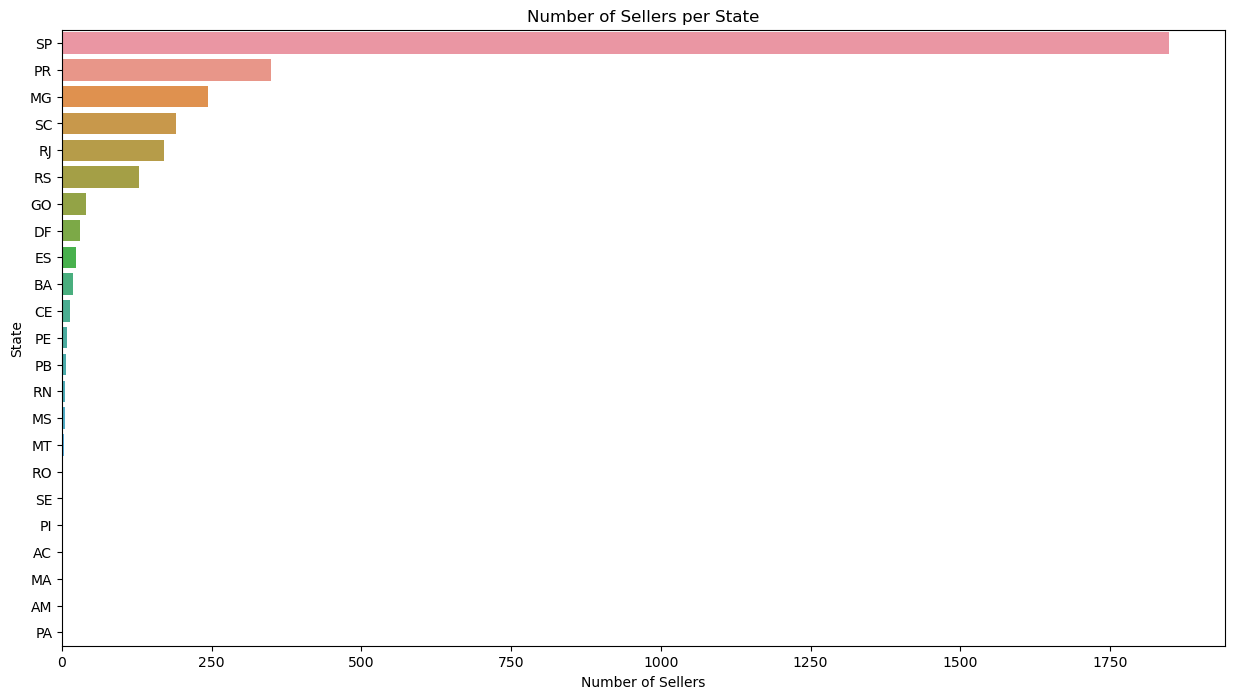

In [3]:
# 1. List all unique states where sellers are located.
cursor = connection.cursor()
cursor.execute("SELECT seller_state, COUNT(*) as seller_count FROM sellers GROUP BY seller_state;")
result = cursor.fetchall()

# Convert the result to a DataFrame for easier manipulation and visualization
states_df = pd.DataFrame(result, columns=['State', 'Seller Count'])

# Plot the number of sellers per state as a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=states_df, y='State', x='Seller Count', order=states_df.sort_values('Seller Count', ascending=False)['State'])
plt.title('Number of Sellers per State')
plt.xlabel('Number of Sellers')
plt.ylabel('State')
plt.show()

In [4]:
# 2. Count the number of unique customers.
cursor.execute("SELECT COUNT(DISTINCT customer_id) FROM customers;")
result = cursor.fetchone()
print(f"Number of unique customers: {result[0]}")

Number of unique customers: 99441


In [5]:
# 3. Calculate the total sales revenue.
cursor = connection.cursor()
cursor.execute("SELECT SUM(price) FROM order_items;")
result = cursor.fetchone()
print(f"Total sales revenue: ${result[0]:,.2f}")

Total sales revenue: $13,591,643.70


In [6]:
# 4. Find the average price of products sold.
cursor.execute("SELECT AVG(price) FROM order_items;")
result = cursor.fetchone()
print(f"Average price of products sold: ${result[0]:,.2f}")

Average price of products sold: $120.65


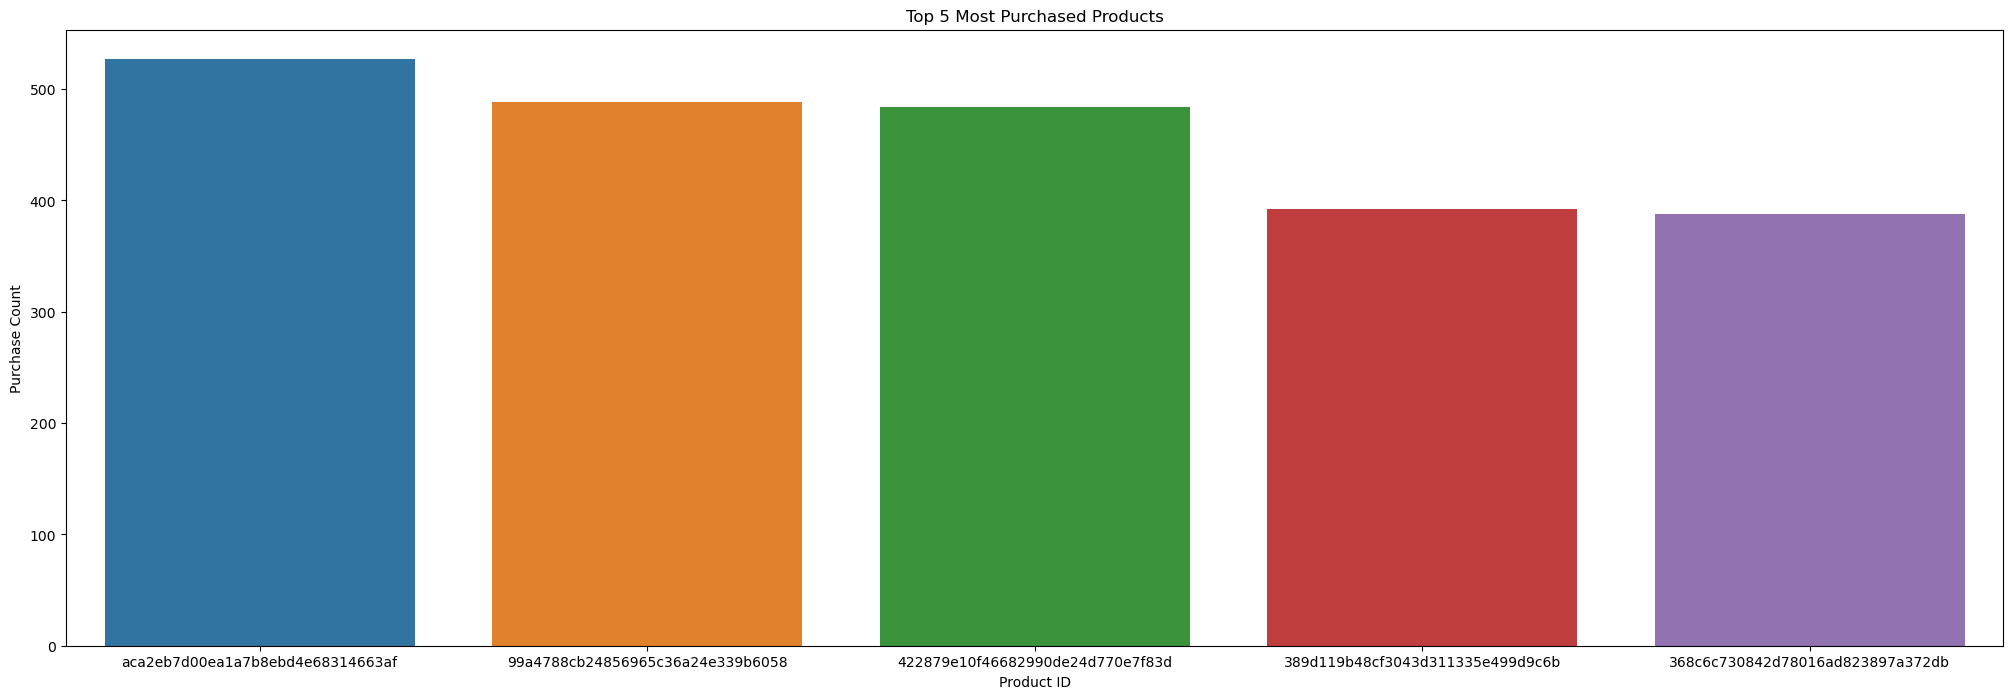

In [7]:
# 5. List the top 5 most purchased products.
cursor.execute("SELECT product_id, COUNT(*) as purchase_count FROM order_items GROUP BY product_id ORDER BY purchase_count DESC LIMIT 5;")
result = cursor.fetchall()

# Convert the result to a DataFrame
products_df = pd.DataFrame(result, columns=['Product ID', 'Purchase Count'])

# Plot the top 5 most purchased products as a bar plot
plt.figure(figsize=(25, 8))
sns.barplot(data=products_df, x='Product ID', y='Purchase Count')
plt.title('Top 5 Most Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Purchase Count')
plt.show()

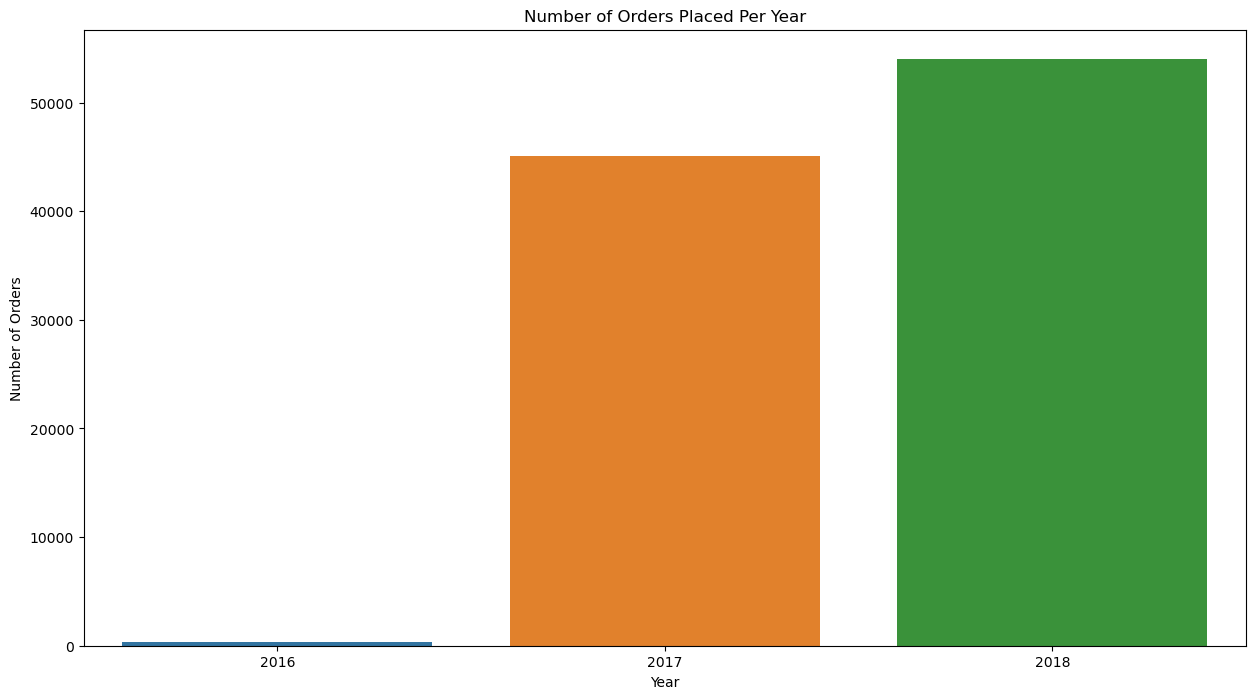

In [8]:
# 6. Count the number of orders placed per year.
cursor.execute("SELECT YEAR(order_purchase_timestamp) as year, COUNT(*) as order_count FROM orders GROUP BY year;")
result = cursor.fetchall()

# Convert the result to a DataFrame
orders_per_year_df = pd.DataFrame(result, columns=['Year', 'Number of Orders'])

# Plot the number of orders placed per year as a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=orders_per_year_df, x='Year', y='Number of Orders')
plt.title('Number of Orders Placed Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()

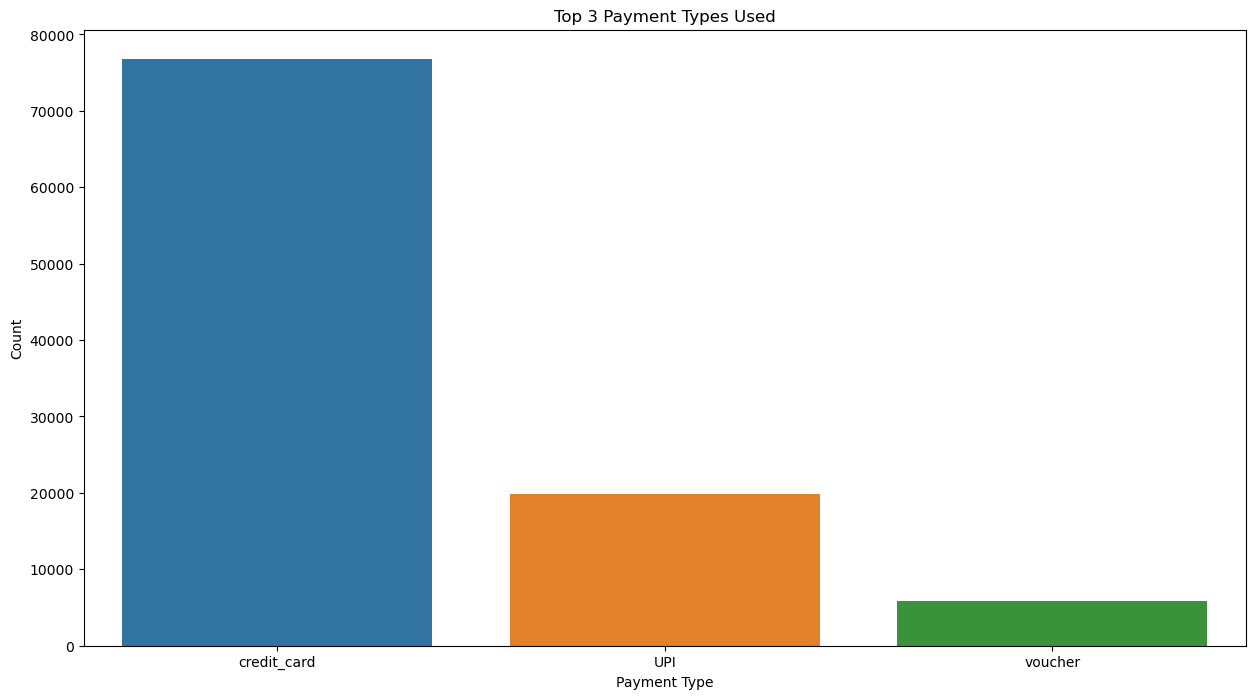

In [9]:
# 7. Identify the top 3 payment types used.
cursor.execute("SELECT payment_type, COUNT(*) as count FROM payments GROUP BY payment_type ORDER BY count DESC LIMIT 3;")
result = cursor.fetchall()

# Convert the result to a DataFrame
payment_types_df = pd.DataFrame(result, columns=['Payment Type', 'Count'])

# Plot the top 3 payment types used as a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=payment_types_df, x='Payment Type', y='Count')
plt.title('Top 3 Payment Types Used')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

In [10]:
# 8. Find the number of orders delivered within 7 days of purchase.
cursor.execute("""
SELECT COUNT(*) 
FROM orders 
WHERE DATEDIFF(order_delivered_customer_date, order_purchase_timestamp) <= 7;
""")
result = cursor.fetchone()
print(f"Number of orders delivered within 7 days: {result[0]}")

Number of orders delivered within 7 days: 30696


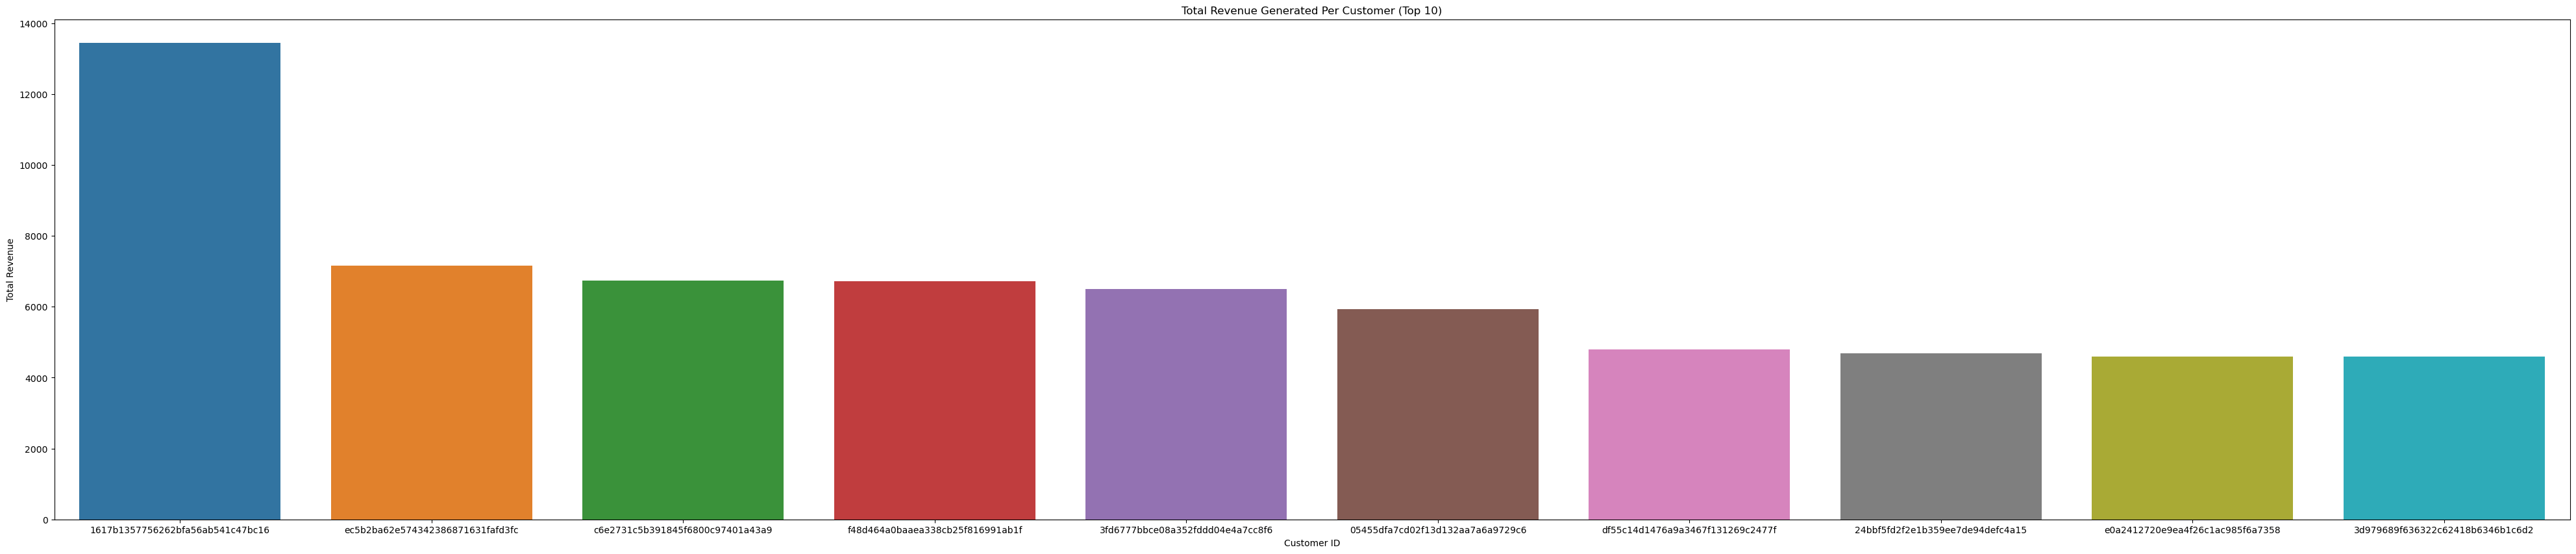

In [11]:
# 9. Calculate the total revenue generated per customer.
cursor.execute("""
SELECT c.customer_id, SUM(oi.price) as total_revenue 
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_id
ORDER BY total_revenue DESC;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
revenue_per_customer_df = pd.DataFrame(result, columns=['Customer ID', 'Total Revenue'])

# Plot the total revenue generated per customer as a bar plot (showing top 10 for readability)
plt.figure(figsize=(50, 10))
sns.barplot(data=revenue_per_customer_df.head(10), x='Customer ID', y='Total Revenue')
plt.title('Total Revenue Generated Per Customer (Top 10)')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()

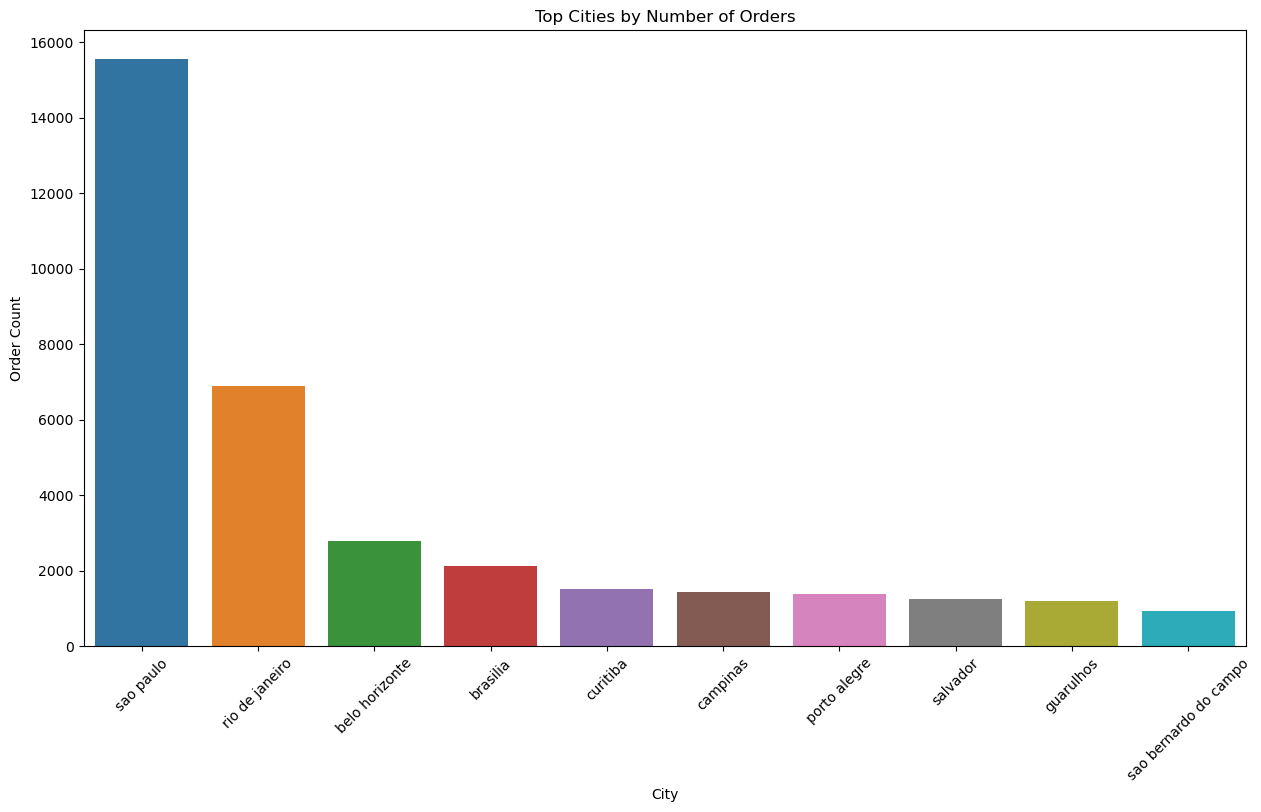

In [12]:
# 10. List all cities where the most orders were placed.
cursor.execute("""
SELECT c.customer_city, COUNT(*) as order_count 
FROM orders o 
JOIN customers c ON o.customer_id = c.customer_id 
GROUP BY c.customer_city 
ORDER BY order_count DESC;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
cities_df = pd.DataFrame(result, columns=['City', 'Order Count'])

# Plot the top 10 cities by number of orders as a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=cities_df.head(10), x='City', y='Order Count')
plt.title('Top Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

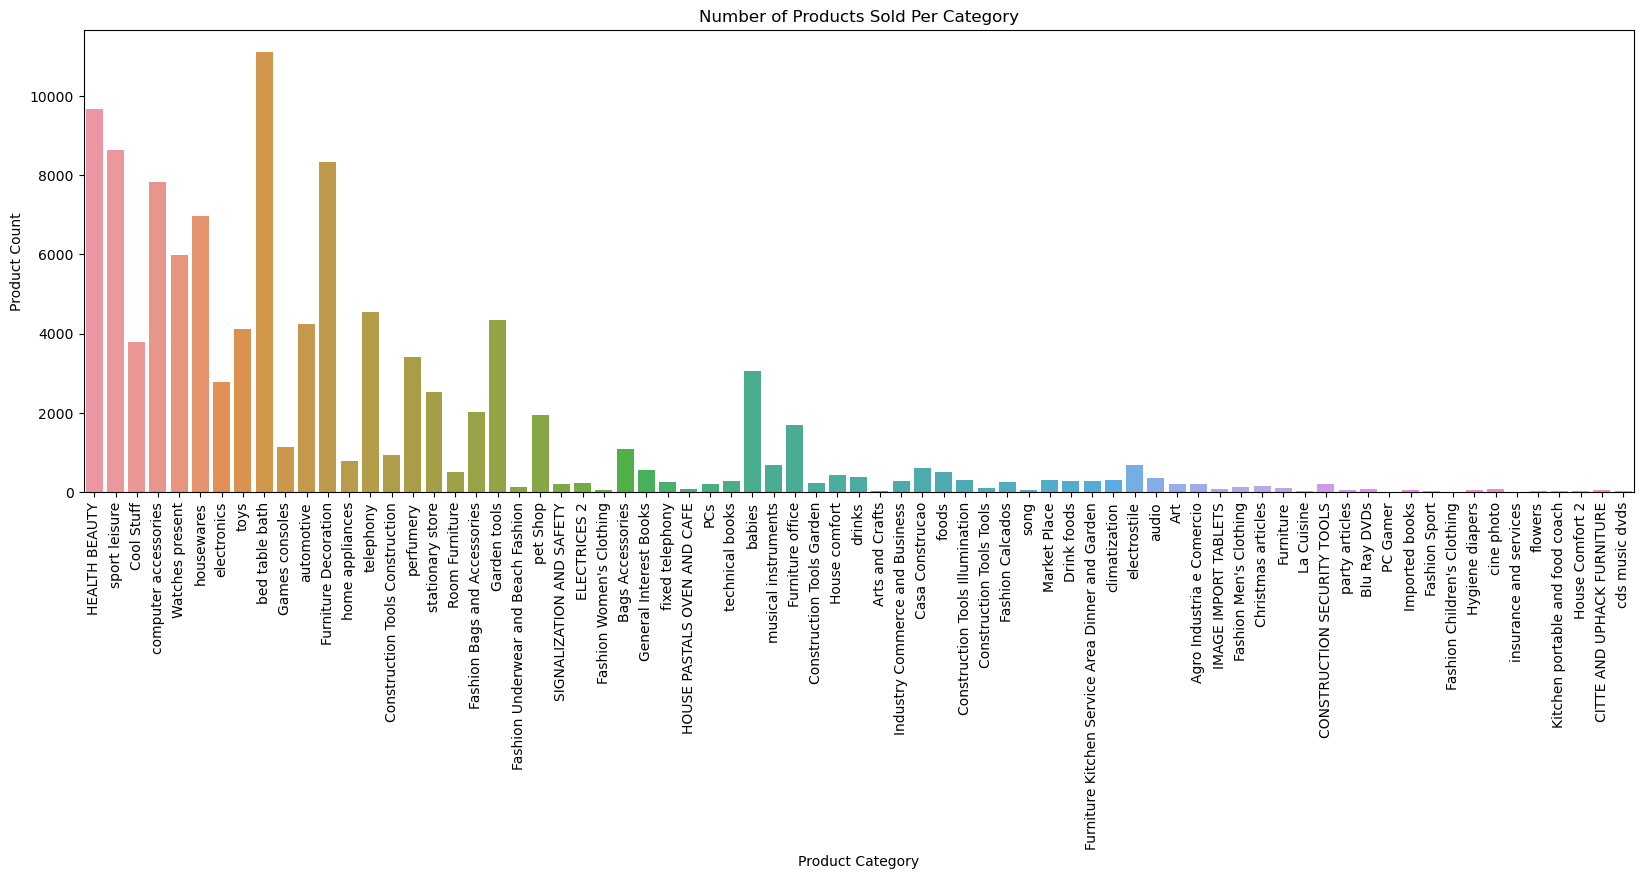

In [13]:
# 11. Count the number of products sold per category.
cursor.execute("""
SELECT p.product_category, COUNT(oi.order_item_id) as product_count 
FROM order_items oi 
JOIN products p ON oi.product_id = p.product_id 
GROUP BY p.product_category;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
products_per_category_df = pd.DataFrame(result, columns=['Product Category', 'Product Count'])

# Plot the number of products sold per category as a bar plot
plt.figure(figsize=(20, 6))
sns.barplot(data=products_per_category_df, x='Product Category', y='Product Count')
plt.title('Number of Products Sold Per Category')
plt.xlabel('Product Category')
plt.ylabel('Product Count')
plt.xticks(rotation=90)
plt.show()

In [14]:
# 12. Identify the month with the highest sales.
cursor.execute("""
SELECT MONTH(order_purchase_timestamp) as month, SUM(oi.price) as total_sales 
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id 
GROUP BY month 
ORDER BY total_sales DESC 
LIMIT 1;
""")
result = cursor.fetchone()
print(f"Month with highest sales: {result[0]} (Month), Total Sales: ${result[1]:,.2f}")


Month with highest sales: 5 (Month), Total Sales: $1,502,588.82


In [15]:
# 13. Calculate the total number of payments made using credit cards.
cursor.execute("SELECT COUNT(*) FROM payments WHERE payment_type = 'credit_card';")
result = cursor.fetchone()
print(f"Total number of payments made using credit cards: {result[0]}")

Total number of payments made using credit cards: 76795


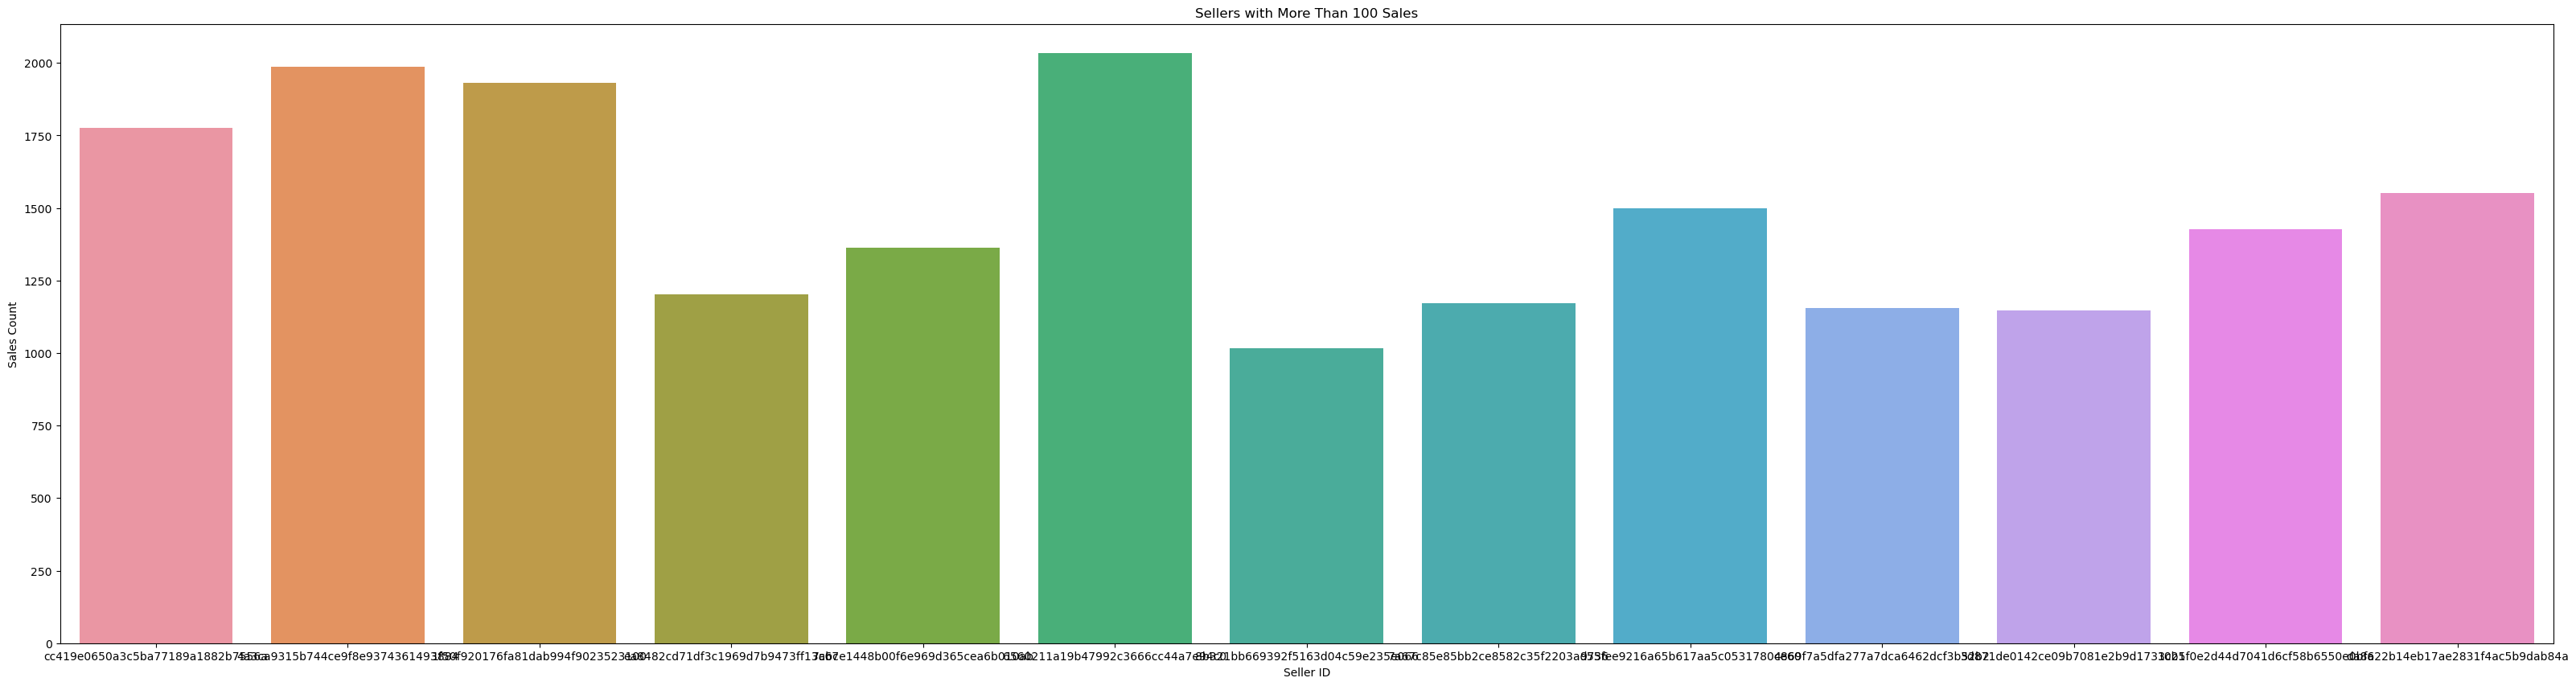

In [16]:
# 14. Find the number of sellers with more than 100 sales.
cursor.execute("""
SELECT seller_id, COUNT(*) as sales_count 
FROM order_items 
GROUP BY seller_id 
HAVING sales_count > 1000;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
sellers_df = pd.DataFrame(result, columns=['Seller ID', 'Sales Count'])

# Plot the sellers with more than 100 sales as a bar plot
plt.figure(figsize=(40, 10))
sns.barplot(data=sellers_df, x='Seller ID', y='Sales Count')
plt.title('Sellers with More Than 100 Sales')
plt.xlabel('Seller ID')
plt.ylabel('Sales Count')
plt.show()

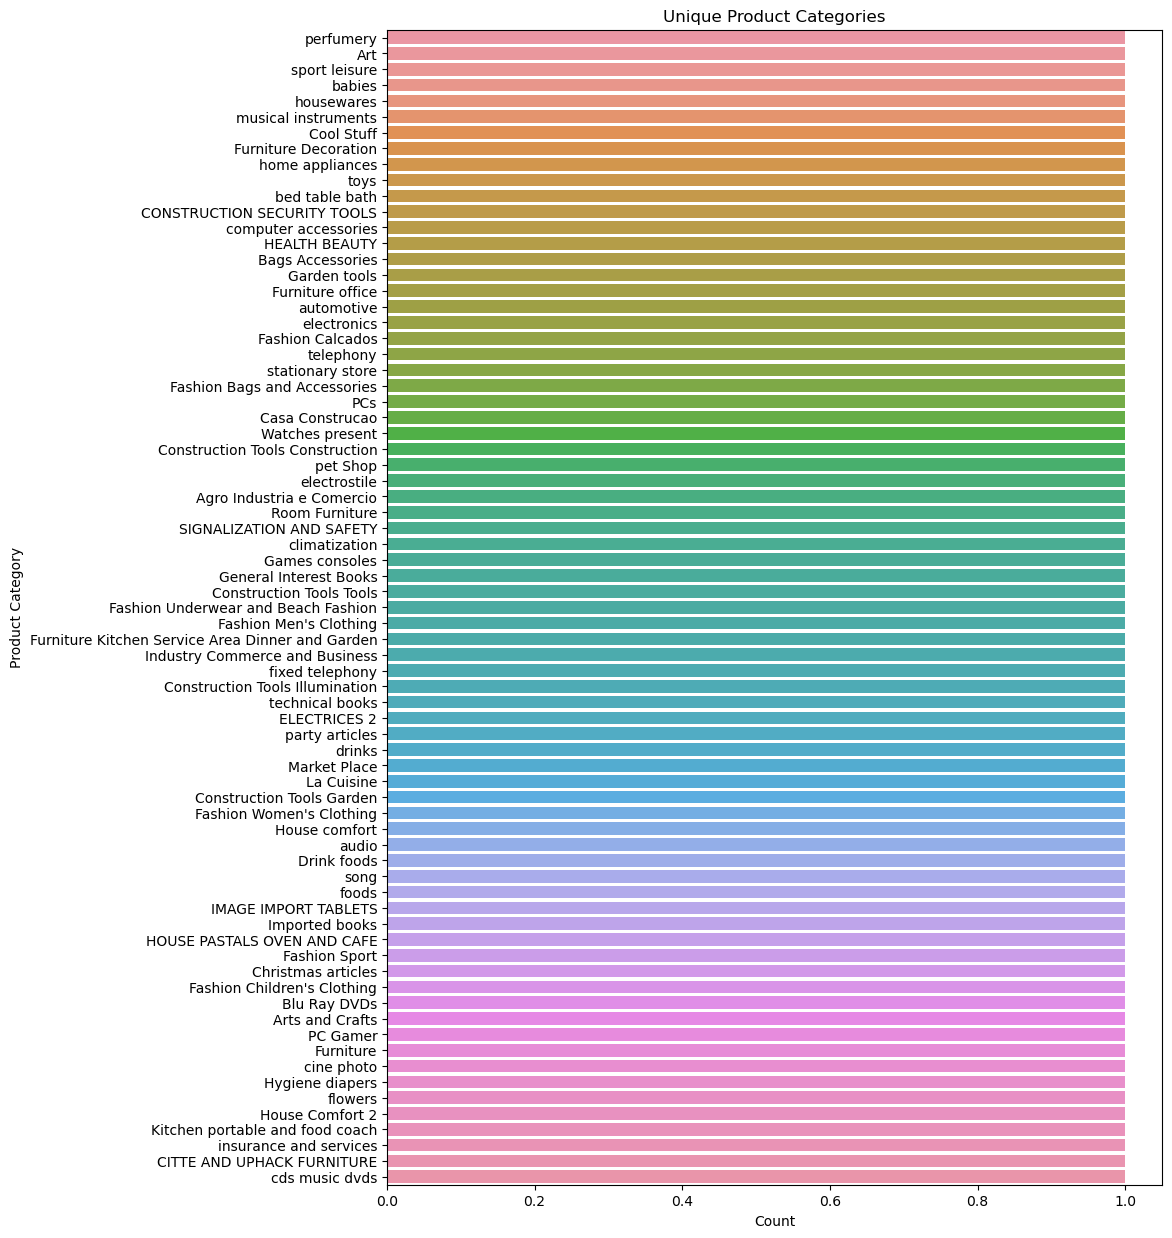

In [17]:
# 15. List all unique product categories.
cursor.execute("SELECT DISTINCT product_category FROM products;")
result = cursor.fetchall()

# Convert the result to a DataFrame
categories_df = pd.DataFrame(result, columns=['Product Category'])

# Plot the unique product categories as a count plot
plt.figure(figsize=(10, 15))
sns.countplot(data=categories_df, y='Product Category')
plt.title('Unique Product Categories')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

In [18]:
# Close connection
cursor.close()
connection.close()